[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("athlete_events.csv")

In [ ]:
df.duplicated().sum()

### Don't forget to drop duplicates first

In [7]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

### Find the missing data in each column

In [ ]:
df.isnull().sum()

### plot the Number of males and females

In [ ]:
plt.figure(figsize=(10,5))
df.Sex.value_counts().plot(kind="bar")
plt.title("Number of males and females")
plt.xlabel("Sex")
plt.ylabel("Number of people")
plt.xticks(rotation=0)
plt.show()



### How many cities do we have and what are they ?

In [ ]:
print(df["City"].nunique())
print(df["City"].unique())

# <font color='red'>**Intermediate level**</fond>

### Find the number of athlete for each year and plot them

In [ ]:
num_athlre=df.groupby("Year")["Name"].nunique()
print(num_athlre.sum())
plt.figure(figsize=(20,10))
num_athlre.plot(kind="bar")
plt.title("Number of athlete for each year",size=25)
plt.xlabel("Year",size=25)
plt.ylabel("Number of athlete",size=25)

plt.xticks(rotation=45,size=25)
plt.yticks(size=25)


plt.show()


### Which athlete participated the most? (his/her name and ID)

In [ ]:
M=df[df.Sex=="M"].groupby("Name")["ID"].count().sort_values(ascending=False).head(1)
F=df[df.Sex=="F"].groupby("Name")["ID"].count().sort_values(ascending=False).head(1)
print(f"Male : {M}")
print(f"FeMale : {F}")


# <font color='red'>**Advanced level**</fond>

### Find the number of each medal for each year.
##### The output should look like this
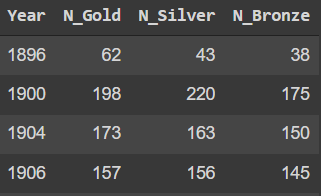

In [ ]:
df.groupby(['Year','Medal'])['Medal'].count().unstack().fillna(0)


# plot the previous table

In [ ]:
medal_year = df.groupby(['Year','Medal'])['Medal'].count().unstack().fillna(0)
medal_year.plot(kind='bar',  figsize=(20,10))
plt.title('Number of Each Medal for Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.show()


# <font color='red'>**You are Geek!**</fond>
### Provide all your answers with plots

### Find the number of winners with the gold medal in each city?

In [ ]:
df[df['Medal'] == 'Gold'].groupby('City')['Medal'].count().sort_values(ascending=False)

### Find the total missing data for each year?

In [ ]:
df.groupby('Year').apply(lambda x: x.isnull().sum().sum())

# <font color='red'>**I dare you to solve this :)**</fond>
### Dont use for loops, and provide all your answers with plots.

### Has the number of athletes changed over time for Summer and Winter?

In [ ]:
df.groupby(['Year', 'Season'])['ID'].nunique().unstack().plot(kind='bar', figsize=(20, 10))
plt.title('Number of Athletes Over Time for Summer and Winter')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.show()


#<font color='red'> **Bouns Questions</fond>**

### How has the participation of male vs. female athletes changed over the years? (You can use a line plot)


In [ ]:
df.groupby('Year')['Sex'].value_counts().unstack().plot(kind='line',figsize=(20,10))
plt.title('Participation of Male vs. Female Athletes Over the Years',size=25)
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('Year',size=25)
plt.ylabel('Number of Athletes',size=25)
plt.show()


### What is the distribution of ages of athletes? Are there any differences in age distributions between medal winners and non-medal winners? (You can use histograms or KDE plots.)

In [ ]:

sns.kdeplot(df['Age'].dropna(), label='All Athletes')
sns.kdeplot(df[df['Medal'].notna()]['Age'].dropna(), label='Medal Winners')
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


### Which countries have won the most medals in the last 30 years?

1.   List item




In [ ]:
z=df[df['Year'] >= df['Year'].max() - 30]
z.groupby('City')['Medal'].count().sort_values(ascending=False)



### Which sports have the highest number of participants in the Summer Olympics vs. the Winter Olympics?

In [ ]:
y = df[df['Season'] == 'Summer'].groupby('Sport')['ID'].nunique().sort_values(ascending=False).head(10)
x = df[df['Season'] == 'Winter'].groupby('Sport')['ID'].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(20,10))
plt.bar(y.index, y.values, color='red', width=0.4, align='center', label='Summer')
plt.bar(x.index, x.values, color='blue', width=0.4, align='edge', label='Winter')
plt.xlabel('Sport',size=10)
plt.ylabel('Number of Unique IDs',size=10)
plt.xticks(rotation=90,size=10)
plt.yticks(size=10)
plt.legend(fontsize=20)
plt.title('Top 10 Sports by Number of Unique IDs in Summer and Winter Seasons')
plt.show()


### Is there a relationship between an athlete's height and weight across different sports? (You can use a scatter plot with height on the x-axis and weight on the y-axis, possibly color-coded by sport or medal status.)

In [ ]:
df.groupby('Sport')['Height'].mean().sort_values(ascending=False)
df.groupby('Sport')['Weight'].mean().sort_values(ascending=False)
plt.figure(figsize=(20,10))
plt.scatter(df.groupby('Sport')['Height'].mean(),df.groupby('Sport')['Weight'].mean())
plt.xlabel('Height',size=20)
plt.ylabel('Weight',size=20)
plt.title('Height vs. Weight by Sport')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()
